## **import libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## **Load the dataset**

In [ ]:
df = pd.read_csv('C:\\Users\\vihan_mhb2hds\\OneDrive\\Documents\\GitHub\\AIML--PG-52\\DATA\\Online Retail.csv', encoding='latin-1')


# 5) Normalization / Scaling


### 5.1 Min-Max Scaling (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
rfm_minmax = minmax_scaler.fit_transform(rfm_df)

rfm_minmax_df = pd.DataFrame(rfm_minmax, columns=['Recency', 'Frequency', 'Monetary'])
print("Min-Max Scaled RFM:\n", rfm_minmax_df)


Min-Max Scaled RFM:
    Recency  Frequency  Monetary
0      0.2   0.000000  0.000000
1      0.6   0.666667  0.666667
2      0.0   0.333333  0.166667
3      1.0   1.000000  1.000000
4      0.4   0.000000  0.066667


### 5.2 Standardization (Z-Score Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
rfm_standard = standard_scaler.fit_transform(rfm_df)

rfm_standard_df = pd.DataFrame(rfm_standard, columns=['Recency', 'Frequency', 'Monetary'])
print("Standardized RFM:\n", rfm_standard_df)


Standardized RFM:
     Recency  Frequency  Monetary
0 -0.697486  -1.028992 -0.978117
1  0.464991   0.685994  0.737878
2 -1.278724  -0.171499 -0.549119
3  1.627467   1.543487  1.595876
4 -0.116248  -1.028992 -0.806518


### 5.3 Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
rfm_robust = robust_scaler.fit_transform(rfm_df)

rfm_robust_df = pd.DataFrame(rfm_robust, columns=['Recency', 'Frequency', 'Monetary'])
print("Robust Scaled RFM:\n", rfm_robust_df)


Robust Scaled RFM:
    Recency  Frequency  Monetary
0     -0.5       -0.5 -0.277778
1      0.5        0.5  0.833333
2     -1.0        0.0  0.000000
3      1.5        1.0  1.388889
4      0.0       -0.5 -0.166667


### 5.4 MaxAbs Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

maxabs_scaler = MaxAbsScaler()
rfm_maxabs = maxabs_scaler.fit_transform(rfm_df)

rfm_maxabs_df = pd.DataFrame(rfm_maxabs, columns=['Recency', 'Frequency', 'Monetary'])
print("MaxAbs Scaled RFM:\n", rfm_maxabs_df)


MaxAbs Scaled RFM:
     Recency  Frequency  Monetary
0  0.333333       0.25     0.250
1  0.666667       0.75     0.750
2  0.166667       0.50     0.375
3  1.000000       1.00     1.000
4  0.500000       0.25     0.300


### Visualization (EDA)

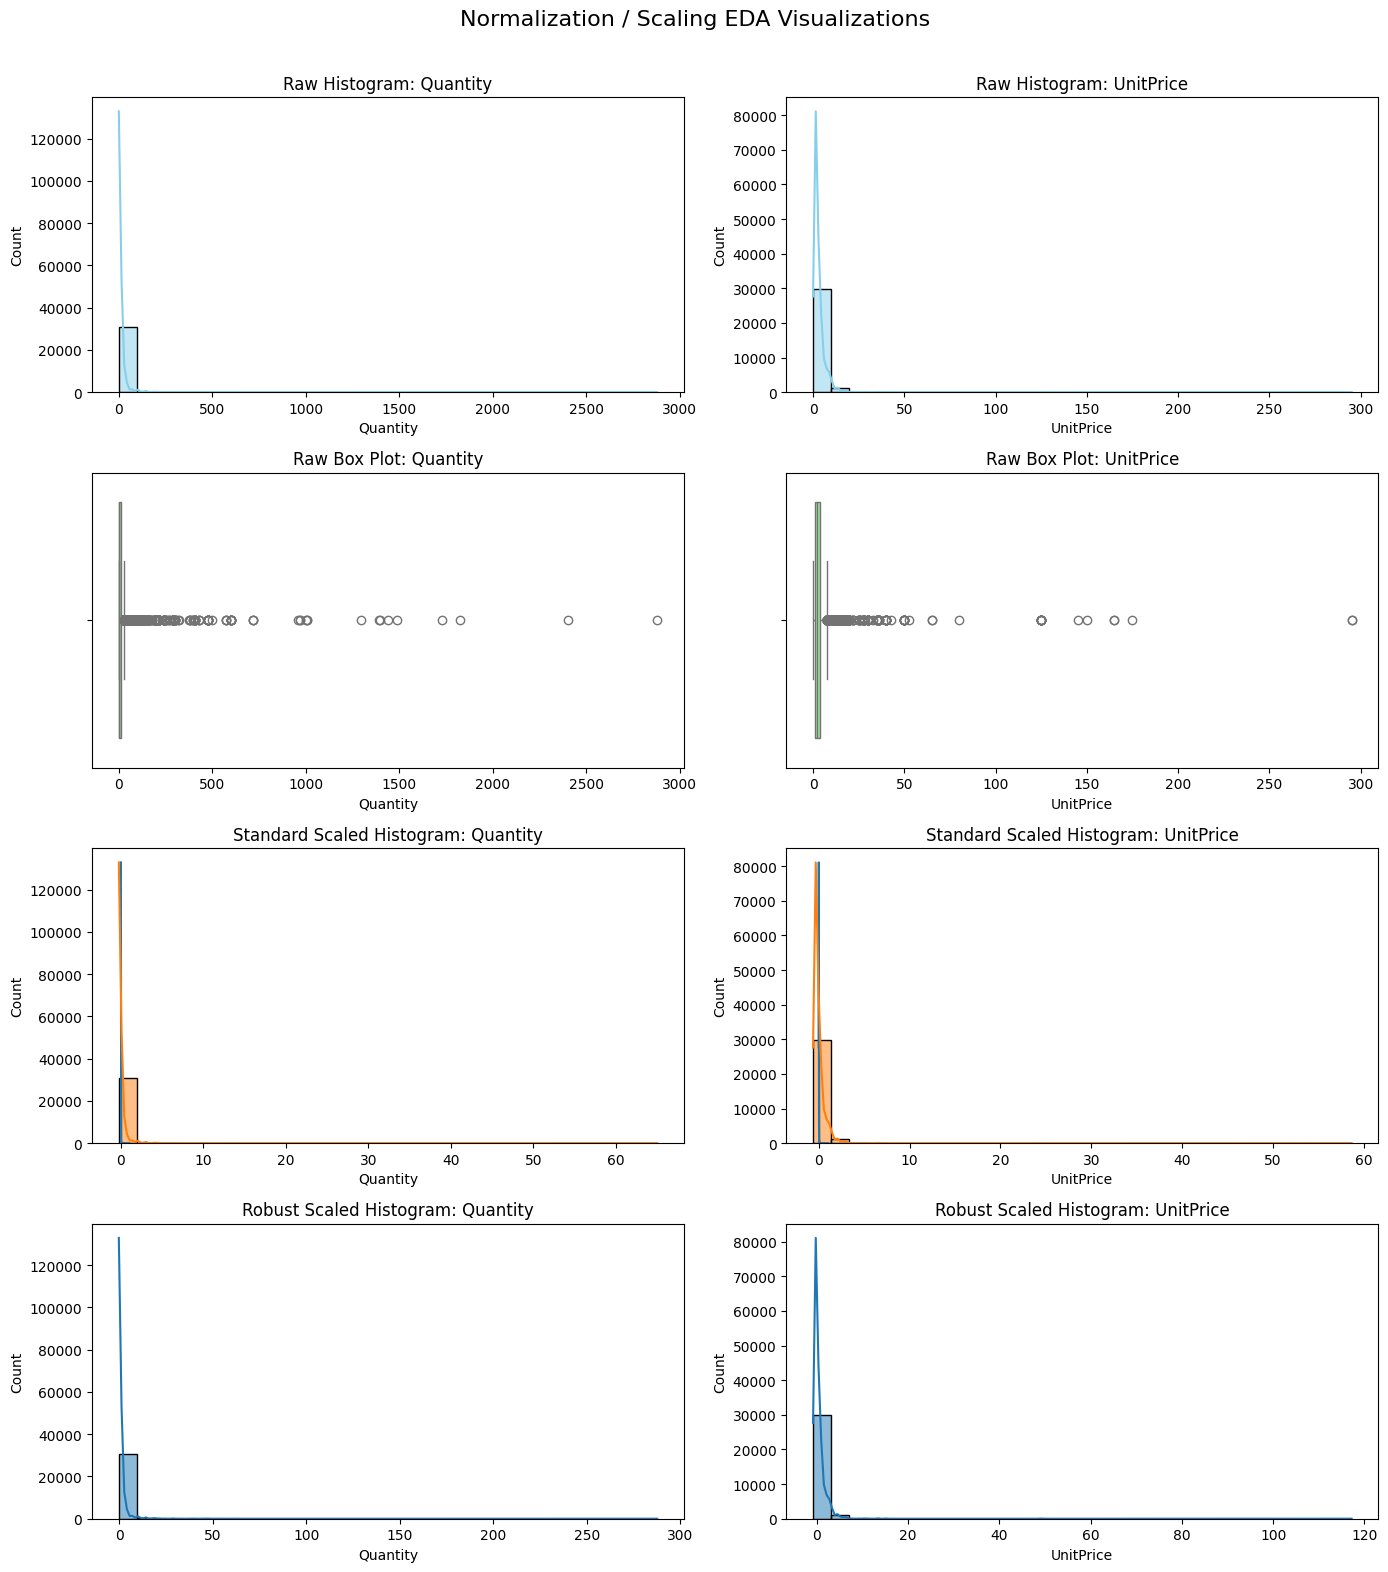

In [ ]:


# Assuming your DataFrame is named df and already cleaned
numeric_cols = ['Quantity', 'UnitPrice']
df_numeric = df[numeric_cols].copy()

# Apply scaling techniques
scalers = {
    'Min-Max': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

scaled_data = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(df_numeric)
    scaled_data[name] = pd.DataFrame(scaled, columns=numeric_cols)

# plotting
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle('Normalization / Scaling EDA Visualizations', fontsize=16)

# raw histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(df_numeric[col], ax=axes[0, i], kde=True, bins=30, color='skyblue')
    axes[0, i].set_title(f'Raw Histogram: {col}')

# raw box plots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f'Raw Box Plot: {col}')

# Scaled histograms
for i, (name, data) in enumerate(scaled_data.items()):
    for j, col in enumerate(numeric_cols):
        sns.histplot(data[col], ax=axes[2 + i//2, j], kde=True, bins=30)
        axes[2 + i//2, j].set_title(f'{name} Scaled Histogram: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
